# Disruptive Data Summer School Test

Given this word list (https://docs.google.com/spreadsheets/d/1Clf6VpAwHRvTxeFft2TRCbSxLvMHO14zJiyA7fH1l5Y/edit#gid=0), write a script to:
- order the list from A to Z and generate a new ordered CSV file;
- count the number of words;
- evaluate the average word length for the list.


We are going to solve this problem first in a very pythonic way using the pandas library that has fucntions built in specifically to analise data nad then using a more generic code that could be implemented in any programming language.

## Solution using pandas
First of all lets import the libraries we are going to need. Pandas to import the datas into a dataframe, numpy to calculate the average number of letters and matplotlib to draw an histogram.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

Using matplotlib backend: Qt5Agg


We import the file "Words.csv" using the pandas function read_csv. We ask the function to not use the first line as column header (header = None) and to use the column name "WORDS" instead. Whe then print the first lines of the dataframe to inspect the result.

In [22]:
df = pd.read_csv('Words.csv', header = None, names = ["WORDS"])
df.head()

,WORDS
0,Hello
1,Facebook
2,Google
3,What Is Data Science
4,Data Science


We sort the words in alphabetical order and print the result. Note that df.sort_values('WORDS') produces an ordered dataframe but does not alter df.

In [24]:
df.sort_values('WORDS').head()

,WORDS
15,ARIMA
10,Best programming language
21,CNN
22,Convolutional Neural Networks
6,Data


We now write the ordered dataframe onto a csv file named 'Alphabetically_ordered_words.csv'. We omit the header and the index

In [25]:
df.sort_values('WORDS').to_csv('Alphabetically_ordered_words.csv', 
                               columns = ["WORDS"], header = False, index = False)

To count the number of words we use the dataframe attribute count() and then print the number.

In [36]:
print("The number of words in the list is: ", list(df.count())[0])

The number of words in the list is:  25


We create a pandas.Series converting the column WORDS of the dataframe df into a strings and then using the attribute len() to calculate the length of each string (word).
Then we convert the series into a numpy array an calculate the avrage length. We print it.

In [58]:
wl = df.WORDS.str.len()
print("The average word length is: ", np.average(np.array(wl)))

The average word length is:  11.44


Finally using the plot attribute in pandas we create an histogram of the word length.

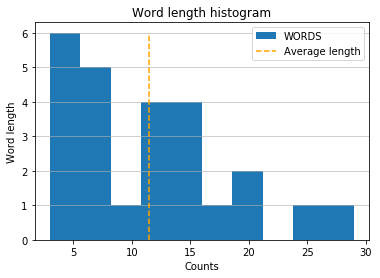

In [67]:
wl.plot.hist()
plt.title('Word length histogram')
plt.xlabel('Counts')
plt.ylabel('Word length')
plt.grid(axis='y', alpha=0.75)
plt.vlines(np.average(wl), 0, 6, colors='orange', linestyles='--', label = 'Average length')
plt.legend()
plt.show()